In [1]:
# Imports and variables
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

from config import Config
import utils
import model as modellib
import visualize
from model import log

from idrid import IdridConfig, IdridDataset


# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_idrid.h5") #Duplicate path for easy access

# COCO trained weights
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load training and validation dataset
dataset_train = IdridDataset(preload = True)
dataset_train.load_idrid('train')
dataset_train.prepare()

dataset_val = IdridDataset(preload = True)
dataset_val.load_idrid('val')
dataset_val.prepare()

  0%|          | 0/39 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 9/9 [01:01<00:00,  6.85s/it]


In [3]:
# Load config
config = IdridConfig()

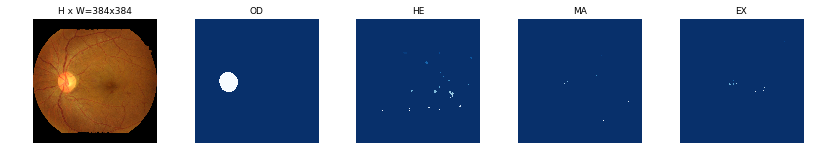

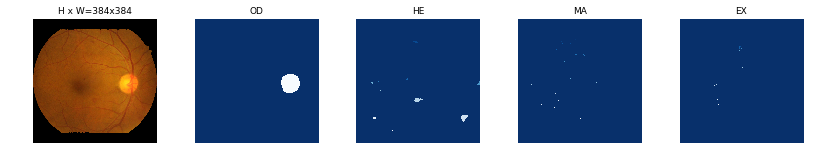

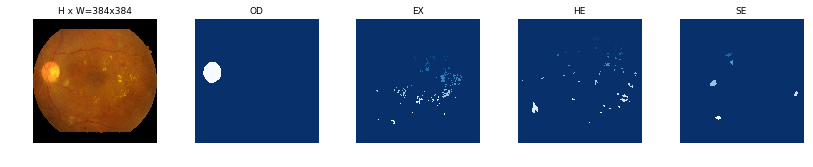

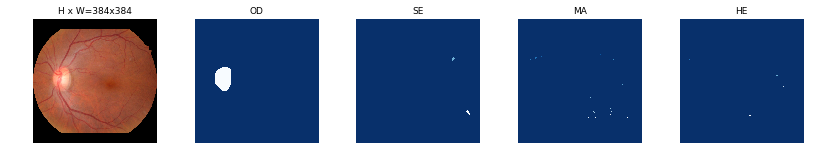

In [4]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [5]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                      model_dir=MODEL_DIR)

In [6]:
#Load weights
last_weights_path = model_path = model.find_last()[1]
if last_weights_path is not None and os.path.exists(last_weights_path):
    model.load_weights(last_weights_path)
    print("Loading previous weights from " + last_weights_path)
else:
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
    print("Loading previous weights from COCO")

Loading previous weights from COCO


In [7]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=500, 
            layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: /home/chuqh/Documents/idrid-2/logs/idrid20180402T1718/mask_rcnn_idrid_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/500
100/100 [==============================] - 232s 2s/step - loss: 4.4572 - rpn_class_loss: 0.6888 - rpn_bbox_loss: 2.2545 - mrcnn_class_loss: 0.2937 - mrcnn_bbox_loss: 0.6120 - mrcnn_mask_loss: 0.6082 - val_loss: 3.3750 - val_rpn_class_loss: 0.3447 - val_rpn_bbox_loss: 2.1847 - val_mrcnn_class_loss: 0.0628 - val_mrcnn_bbox_loss: 0.3290 - val_mrcnn_mask_loss: 0.4538
Epoch 2/500
100/100 [==============================] - 127s 1s/step - loss: 3.0584 - rpn_class_loss: 0.3153 - rpn_bbox_loss: 1.6185 - mrcnn_class_loss: 0.1636 - mrcnn_bbox_loss: 0.4605 - mrcnn_mask_loss: 0.5004 - val_loss: 3.1658 - val_rpn_class_loss: 0.2993 - val_rpn_bbox_loss: 1.8559 - val_mrcnn_class_loss: 0.1079 - val_mrcnn_bbox_loss: 0.4534 - val_mrcnn_mask_loss: 0.4493
Epoch 3/500
100/100 [==============================] - 217s 2s/step - loss: 2.7253 - rpn_class_loss: 0.2890 - rpn_bbox_loss: 1.4075 - mrcnn_class_loss: 0.1579 - mrcnn_bbox_loss: 0.4042 - mrcnn_mask_loss: 0.4666 - val_loss: 2.9986 - val_rpn_clas

Epoch 23/500
100/100 [==============================] - 215s 2s/step - loss: 1.4787 - rpn_class_loss: 0.1639 - rpn_bbox_loss: 0.5938 - mrcnn_class_loss: 0.1532 - mrcnn_bbox_loss: 0.1817 - mrcnn_mask_loss: 0.3860 - val_loss: 2.7746 - val_rpn_class_loss: 0.2191 - val_rpn_bbox_loss: 1.6329 - val_mrcnn_class_loss: 0.1045 - val_mrcnn_bbox_loss: 0.4230 - val_mrcnn_mask_loss: 0.3950
Epoch 24/500
100/100 [==============================] - 216s 2s/step - loss: 1.4710 - rpn_class_loss: 0.1631 - rpn_bbox_loss: 0.5760 - mrcnn_class_loss: 0.1628 - mrcnn_bbox_loss: 0.1802 - mrcnn_mask_loss: 0.3889 - val_loss: 2.5796 - val_rpn_class_loss: 0.2180 - val_rpn_bbox_loss: 1.6854 - val_mrcnn_class_loss: 0.0690 - val_mrcnn_bbox_loss: 0.2773 - val_mrcnn_mask_loss: 0.3299
Epoch 25/500
100/100 [==============================] - 211s 2s/step - loss: 1.4530 - rpn_class_loss: 0.1591 - rpn_bbox_loss: 0.5759 - mrcnn_class_loss: 0.1566 - mrcnn_bbox_loss: 0.1787 - mrcnn_mask_loss: 0.3828 - val_loss: 2.6332 - val_rpn_c

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_33.mat', 'source': 'idrid', 'id': 20}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 211s 2s/step - loss: 1.1854 - rpn_class_loss: 0.1279 - rpn_bbox_loss: 0.3926 - mrcnn_class_loss: 0.1649 - mrcnn_bbox_loss: 0.1372 - mrcnn_mask_loss: 0.3628 - val_loss: 2.8574 - val_rpn_class_loss: 0.2204 - val_rpn_bbox_loss: 1.6323 - val_mrcnn_class_loss: 0.1250 - val_mrcnn_bbox_loss: 0.4568 - val_mrcnn_mask_loss: 0.4228
Epoch 44/500
100/100 [==============================] - 212s 2s/step - loss: 1.1679 - rpn_class_loss: 0.1238 - rpn_bbox_loss: 0.3864 - mrcnn_class_loss: 0.1579 - mrcnn_bbox_loss: 0.1399 - mrcnn_mask_loss: 0.3600 - val_loss: 2.7180 - val_rpn_class_loss: 0.2158 - val_rpn_bbox_loss: 1.6467 - val_mrcnn_class_loss: 0.0539 - val_mrcnn_bbox_loss: 0.4085 - val_mrcnn_mask_loss: 0.3931
Epoch 45/500
100/100 [==============================] - 215s 2s/step - loss: 1.1993 - rpn_class_loss: 0.1304 - rpn_bbox_loss: 0.4052 - mrcnn_class_loss: 0.1641 - mrcnn_bbox_loss: 0.1409 - mrcnn_mask_loss: 0.3586 - val_loss: 2.8906 - val_rpn_class_loss: 0.

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_33.mat', 'source': 'idrid', 'id': 20}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 212s 2s/step - loss: 1.0366 - rpn_class_loss: 0.1082 - rpn_bbox_loss: 0.3128 - mrcnn_class_loss: 0.1584 - mrcnn_bbox_loss: 0.1195 - mrcnn_mask_loss: 0.3377 - val_loss: 2.6649 - val_rpn_class_loss: 0.2671 - val_rpn_bbox_loss: 1.5522 - val_mrcnn_class_loss: 0.0713 - val_mrcnn_bbox_loss: 0.3909 - val_mrcnn_mask_loss: 0.3834
Epoch 61/500
100/100 [==============================] - 220s 2s/step - loss: 1.0544 - rpn_class_loss: 0.1112 - rpn_bbox_loss: 0.3163 - mrcnn_class_loss: 0.1640 - mrcnn_bbox_loss: 0.1211 - mrcnn_mask_loss: 0.3417 - val_loss: 2.7650 - val_rpn_class_loss: 0.2559 - val_rpn_bbox_loss: 1.5469 - val_mrcnn_class_loss: 0.0966 - val_mrcnn_bbox_loss: 0.4253 - val_mrcnn_mask_loss: 0.4403
Epoch 62/500
100/100 [==============================] - 198s 2s/step - loss: 0.9856 - rpn_class_loss: 0.1052 - rpn_bbox_loss: 0.2842 - mrcnn_class_loss: 0.1469 - mrcnn_bbox_loss: 0.1169 - mrcnn_mask_loss: 0.3324 - val_loss: 2.6058 - val_rpn_class_loss: 0.

Epoch 82/500
100/100 [==============================] - 216s 2s/step - loss: 0.9211 - rpn_class_loss: 0.0949 - rpn_bbox_loss: 0.2517 - mrcnn_class_loss: 0.1535 - mrcnn_bbox_loss: 0.1038 - mrcnn_mask_loss: 0.3172 - val_loss: 2.8787 - val_rpn_class_loss: 0.2858 - val_rpn_bbox_loss: 1.5805 - val_mrcnn_class_loss: 0.0998 - val_mrcnn_bbox_loss: 0.4574 - val_mrcnn_mask_loss: 0.4552
Epoch 83/500
100/100 [==============================] - 209s 2s/step - loss: 0.8894 - rpn_class_loss: 0.0924 - rpn_bbox_loss: 0.2446 - mrcnn_class_loss: 0.1484 - mrcnn_bbox_loss: 0.0973 - mrcnn_mask_loss: 0.3065 - val_loss: 3.0482 - val_rpn_class_loss: 0.3143 - val_rpn_bbox_loss: 1.5738 - val_mrcnn_class_loss: 0.1857 - val_mrcnn_bbox_loss: 0.4668 - val_mrcnn_mask_loss: 0.5076
Epoch 84/500
100/100 [==============================] - 211s 2s/step - loss: 0.8937 - rpn_class_loss: 0.0935 - rpn_bbox_loss: 0.2360 - mrcnn_class_loss: 0.1501 - mrcnn_bbox_loss: 0.1016 - mrcnn_mask_loss: 0.3124 - val_loss: 2.8112 - val_rpn_c

Epoch 104/500
100/100 [==============================] - 243s 2s/step - loss: 0.8236 - rpn_class_loss: 0.0859 - rpn_bbox_loss: 0.2091 - mrcnn_class_loss: 0.1476 - mrcnn_bbox_loss: 0.0895 - mrcnn_mask_loss: 0.2916 - val_loss: 2.9357 - val_rpn_class_loss: 0.3321 - val_rpn_bbox_loss: 1.5283 - val_mrcnn_class_loss: 0.1152 - val_mrcnn_bbox_loss: 0.4600 - val_mrcnn_mask_loss: 0.5001
Epoch 105/500
100/100 [==============================] - 226s 2s/step - loss: 0.8223 - rpn_class_loss: 0.0851 - rpn_bbox_loss: 0.2045 - mrcnn_class_loss: 0.1493 - mrcnn_bbox_loss: 0.0914 - mrcnn_mask_loss: 0.2920 - val_loss: 2.9016 - val_rpn_class_loss: 0.4188 - val_rpn_bbox_loss: 1.5527 - val_mrcnn_class_loss: 0.0784 - val_mrcnn_bbox_loss: 0.4210 - val_mrcnn_mask_loss: 0.4308
Epoch 106/500
 40/100 [===========>..................] - ETA: 2:03 - loss: 0.7913 - rpn_class_loss: 0.0801 - rpn_bbox_loss: 0.2049 - mrcnn_class_loss: 0.1306 - mrcnn_bbox_loss: 0.0921 - mrcnn_mask_loss: 0.2837

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_20.mat', 'source': 'idrid', 'id': 27}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


 78/100 [======================>.......] - ETA: 47s - loss: 0.7971 - rpn_class_loss: 0.0806 - rpn_bbox_loss: 0.2064 - mrcnn_class_loss: 0.1334 - mrcnn_bbox_loss: 0.0904 - mrcnn_mask_loss: 0.2863

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_10.mat', 'source': 'idrid', 'id': 34}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1300, in pad
    narray = np.array(array)
MemoryError


100/100 [==============================] - 218s 2s/step - loss: 0.7986 - rpn_class_loss: 0.0811 - rpn_bbox_loss: 0.2048 - mrcnn_class_loss: 0.1361 - mrcnn_bbox_loss: 0.0889 - mrcnn_mask_loss: 0.2878 - val_loss: 2.7862 - val_rpn_class_loss: 0.4171 - val_rpn_bbox_loss: 1.5935 - val_mrcnn_class_loss: 0.0892 - val_mrcnn_bbox_loss: 0.3165 - val_mrcnn_mask_loss: 0.3698
Epoch 107/500
  3/100 [..............................] - ETA: 2:00 - loss: 0.6294 - rpn_class_loss: 0.0517 - rpn_bbox_loss: 0.1320 - mrcnn_class_loss: 0.0923 - mrcnn_bbox_loss: 0.0813 - mrcnn_mask_loss: 0.2721

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_25.mat', 'source': 'idrid', 'id': 6}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 216s 2s/step - loss: 0.8057 - rpn_class_loss: 0.0809 - rpn_bbox_loss: 0.2061 - mrcnn_class_loss: 0.1420 - mrcnn_bbox_loss: 0.0884 - mrcnn_mask_loss: 0.2884 - val_loss: 2.6951 - val_rpn_class_loss: 0.3646 - val_rpn_bbox_loss: 1.5964 - val_mrcnn_class_loss: 0.0606 - val_mrcnn_bbox_loss: 0.3175 - val_mrcnn_mask_loss: 0.3559
Epoch 108/500
100/100 [==============================] - 212s 2s/step - loss: 0.8040 - rpn_class_loss: 0.0817 - rpn_bbox_loss: 0.2013 - mrcnn_class_loss: 0.1444 - mrcnn_bbox_loss: 0.0889 - mrcnn_mask_loss: 0.2877 - val_loss: 2.8212 - val_rpn_class_loss: 0.3445 - val_rpn_bbox_loss: 1.5367 - val_mrcnn_class_loss: 0.0932 - val_mrcnn_bbox_loss: 0.3903 - val_mrcnn_mask_loss: 0.4565
Epoch 109/500
100/100 [==============================] - 210s 2s/step - loss: 0.7925 - rpn_class_loss: 0.0795 - rpn_bbox_loss: 0.2012 - mrcnn_class_loss: 0.1413 - mrcnn_bbox_loss: 0.0855 - mrcnn_mask_loss: 0.2851 - val_loss: 2.8378 - val_rpn_class_loss: 

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_10.mat', 'source': 'idrid', 'id': 34}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 209s 2s/step - loss: 0.7876 - rpn_class_loss: 0.0815 - rpn_bbox_loss: 0.1930 - mrcnn_class_loss: 0.1434 - mrcnn_bbox_loss: 0.0849 - mrcnn_mask_loss: 0.2849 - val_loss: 3.0314 - val_rpn_class_loss: 0.3389 - val_rpn_bbox_loss: 1.4967 - val_mrcnn_class_loss: 0.1580 - val_mrcnn_bbox_loss: 0.5037 - val_mrcnn_mask_loss: 0.5342
Epoch 111/500
100/100 [==============================] - 214s 2s/step - loss: 0.7976 - rpn_class_loss: 0.0834 - rpn_bbox_loss: 0.1960 - mrcnn_class_loss: 0.1438 - mrcnn_bbox_loss: 0.0855 - mrcnn_mask_loss: 0.2889 - val_loss: 2.8265 - val_rpn_class_loss: 0.4025 - val_rpn_bbox_loss: 1.5348 - val_mrcnn_class_loss: 0.1075 - val_mrcnn_bbox_loss: 0.3909 - val_mrcnn_mask_loss: 0.3907
Epoch 112/500
100/100 [==============================] - 219s 2s/step - loss: 0.7852 - rpn_class_loss: 0.0808 - rpn_bbox_loss: 0.1969 - mrcnn_class_loss: 0.1437 - mrcnn_bbox_loss: 0.0841 - mrcnn_mask_loss: 0.2798 - val_loss: 3.1764 - val_rpn_class_loss: 

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_10.mat', 'source': 'idrid', 'id': 34}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 212s 2s/step - loss: 0.7583 - rpn_class_loss: 0.0773 - rpn_bbox_loss: 0.1847 - mrcnn_class_loss: 0.1387 - mrcnn_bbox_loss: 0.0813 - mrcnn_mask_loss: 0.2763 - val_loss: 2.9882 - val_rpn_class_loss: 0.4167 - val_rpn_bbox_loss: 1.5793 - val_mrcnn_class_loss: 0.1328 - val_mrcnn_bbox_loss: 0.3886 - val_mrcnn_mask_loss: 0.4707
Epoch 117/500
100/100 [==============================] - 215s 2s/step - loss: 0.7720 - rpn_class_loss: 0.0788 - rpn_bbox_loss: 0.1887 - mrcnn_class_loss: 0.1446 - mrcnn_bbox_loss: 0.0830 - mrcnn_mask_loss: 0.2770 - val_loss: 3.0412 - val_rpn_class_loss: 0.4407 - val_rpn_bbox_loss: 1.5581 - val_mrcnn_class_loss: 0.1270 - val_mrcnn_bbox_loss: 0.4060 - val_mrcnn_mask_loss: 0.5093
Epoch 118/500
100/100 [==============================] - 217s 2s/step - loss: 0.7834 - rpn_class_loss: 0.0812 - rpn_bbox_loss: 0.1908 - mrcnn_class_loss: 0.1455 - mrcnn_bbox_loss: 0.0850 - mrcnn_mask_loss: 0.2808 - val_loss: 3.0832 - val_rpn_class_loss: 

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_10.mat', 'source': 'idrid', 'id': 34}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 222s 2s/step - loss: 0.7443 - rpn_class_loss: 0.0741 - rpn_bbox_loss: 0.1823 - mrcnn_class_loss: 0.1423 - mrcnn_bbox_loss: 0.0771 - mrcnn_mask_loss: 0.2685 - val_loss: 3.1550 - val_rpn_class_loss: 0.4320 - val_rpn_bbox_loss: 1.5948 - val_mrcnn_class_loss: 0.1395 - val_mrcnn_bbox_loss: 0.4639 - val_mrcnn_mask_loss: 0.5247
Epoch 131/500
 72/100 [====================>.........] - ETA: 58s - loss: 0.7178 - rpn_class_loss: 0.0728 - rpn_bbox_loss: 0.1633 - mrcnn_class_loss: 0.1404 - mrcnn_bbox_loss: 0.0745 - mrcnn_mask_loss: 0.2667 

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_10.mat', 'source': 'idrid', 'id': 34}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError


100/100 [==============================] - 219s 2s/step - loss: 0.7272 - rpn_class_loss: 0.0745 - rpn_bbox_loss: 0.1650 - mrcnn_class_loss: 0.1428 - mrcnn_bbox_loss: 0.0760 - mrcnn_mask_loss: 0.2690 - val_loss: 3.0179 - val_rpn_class_loss: 0.4816 - val_rpn_bbox_loss: 1.5659 - val_mrcnn_class_loss: 0.1456 - val_mrcnn_bbox_loss: 0.3503 - val_mrcnn_mask_loss: 0.4745
Epoch 132/500
100/100 [==============================] - 206s 2s/step - loss: 0.7091 - rpn_class_loss: 0.0704 - rpn_bbox_loss: 0.1631 - mrcnn_class_loss: 0.1345 - mrcnn_bbox_loss: 0.0771 - mrcnn_mask_loss: 0.2640 - val_loss: 3.1941 - val_rpn_class_loss: 0.4629 - val_rpn_bbox_loss: 1.5533 - val_mrcnn_class_loss: 0.1726 - val_mrcnn_bbox_loss: 0.4746 - val_mrcnn_mask_loss: 0.5306
Epoch 133/500
100/100 [==============================] - 220s 2s/step - loss: 0.7330 - rpn_class_loss: 0.0746 - rpn_bbox_loss: 0.1683 - mrcnn_class_loss: 0.1468 - mrcnn_bbox_loss: 0.0771 - mrcnn_mask_loss: 0.2662 - val_loss: 3.0139 - val_rpn_class_loss: 

ERROR:root:Error processing image {'path': './images/raw/DR/train/IDRiD_10.mat', 'source': 'idrid', 'id': 34}
Traceback (most recent call last):
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1198, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/chuqh/Documents/idrid-2/utils.py", line 446, in resize_mask
    mask = np.pad(mask, padding, mode='constant', constant_values=0)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/arraypad.py", line 1369, in pad
    newmat = narray.copy()
MemoryError
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/data_utils.py", line 663, in _data_generator_task
    generator_output = next(self._generator)
  File "/home/chuqh/Documents/idrid-2/model.py", line 1637, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/chuqh/Documents/i

MemoryError: 

In [ ]:
# Save weights
model.keras_model.save_weights(MODEL_WEIGHTS_PATH)